# RNN (Recurrent Neural Network, 순환신경망 )
- 순환데이터, 순환신경망 
- 텍스트 데이터(ex: I am a boy) : 순서가 의미가 있다. 
- 시계열 데이터(ex: 1일 10도, 2일 8도)

---
### 순환신경망(RNN: Recurrent Neural Network)

- IMDB(Interner Movie Data Base)
- IMDB 구성 : train data (25000 개중 긍정 12500개, 부정 12500개)
- NLP : Natural Language Processing(자연어 처리)
- 말뭉치 : 하나의 데이터셋을 말뭉치라고 표현
- 토큰 : 하나의 단어를 토큰이라고 표현
- 어휘사전 : 번호로 구분된 유일한 단어들의 집단
- 머신러닝이나 딥러닝 에서는 데이터가 숫자로 구성되어 있어야 하므로 이런 단어들의 고유한 번호로 할당하여 사용

In [2]:
from tensorflow.keras.datasets import imdb
# 이 중 500 단어를 사용하겠다.
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500)

In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
# train의 첫번쨰 문장의 token 갯수
len(train_input[0])

218

In [5]:
# 첫번쨰 댓글의 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 샘플의 시작부분 토큰은 1을 사용한다.(실제 단어가 아님, 간단한 표시 )
- 2는 선정한 단어갯수에 포함되지 않는 단어를 표현한다.(500 범위 내에 있는 단어가 아님)
- train_input의 자체는 numpy 배열이나 댓글에 사용된 토큰수가 다르기 때문에 numpy 배열을 사용 못하고 python list를 사용한다.

In [6]:
# train의 target 출력 
print(train_target[:10])
# 1: 긍정 ,0 : 부정 

[1 0 0 1 0 0 1 0 1 0]


In [7]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split
train_input, val_input, train_target,val_target= train_test_split(
    train_input,train_target, test_size=0.2,random_state = 42
)

In [8]:
# 각 리뷰마다 문장 길이를 시각화 
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths))
# 중앙값이 평균보다 오른쪽으로 치우쳐짐 

239.00925 178.0


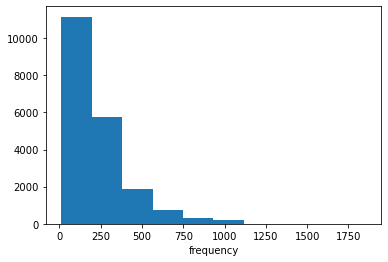

In [9]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("length")
plt.xlabel("frequency")
plt.show()

----
# Sequence Padding
- 전체 자릿수를 100으로 가정햇을 경우 한문장에 3개 토큰만 있을 경우 나머지 97갠은 비워지고 이를 0으로 채우는 과정 

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 그래프에서 100개부분이 제일 많은 거 같아 100개의 토큰만 사용 
# 훈련데이터
train_seq = pad_sequences(train_input,maxlen=100)
# 검증데이터 
val_seq = pad_sequences(val_input,maxlen=100)

In [11]:
# 크기확인 
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련세트 중 500개는 검증세트로 빠짐 

In [12]:
# 첫번쨰 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
# 원본의 첫번째 댓글의 마지막 10개 
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5])
# 단어가 없는 곳은 0(들여쓰기)이라 하고 단어가 중간에 없어졌으면 2 

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


---
# 순환신경망 모델 만들기

In [15]:
from tensorflow import keras

In [16]:
model = keras.Sequential()
# 8 => sell(노드 )
# 토큰이 8개는 쓰겟다~ (최소 예상 )
# 이 8도 hyper parameter
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 토큰의 숫자의 크기가 의미없다
# 500 개를 500으로 분류 => one hot encoding

model.add(keras.layers.Dense(1,activation="sigmoid"))
# 0,1 로 출력, 이진분류 

2022-07-22 11:45:32.948991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# one hot ecoding
train_on = keras.utils.to_categorical(train_seq)
print(train_on.shape)

(20000, 100, 500)


In [18]:
# One hot encoding 확인
print(np.sum(train_on[0][0]))

1.0


In [19]:
# 검증 데이터 one hot encoding
val_on = keras.utils.to_categorical(val_seq)

In [20]:
# 확인 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [21]:
500 * 8 + (8 * 8) + 8
# 가중치 * 입력층 + 셀의 갯수 + 절편

4072

In [22]:
# optimizer
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    # 손실함수는 출력층에 따라 0,1
    loss = "binary_crossentropy",
    metrics = "accuracy",
    )
# 최적의 값 찾기
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-simplernn-model.h5")
# 조기종료 
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    train_on,
    train_target,
    # 최소 
    epochs = 100,
    batch_size = 64, # mini batch 경사 하강법( 순환갯수 )
    # 검증 data
    validation_data = (val_on,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 18s 53ms/step - loss: 0.6997 - accuracy: 0.5023 - val_loss: 0.6930 - val_accuracy: 0.5228
Epoch 2/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6939 - accuracy: 0.5183 - val_loss: 0.6889 - val_accuracy: 0.5432
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6890 - accuracy: 0.5364 - val_loss: 0.6845 - val_accuracy: 0.5636
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6801 - accuracy: 0.5671 - val_loss: 0.6631 - val_accuracy: 0.6032
Epoch 5/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6483 - accuracy: 0.6355 - val_loss: 0.6369 - val_accuracy: 0.6480
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6279 - accuracy: 0.6615 - val_loss: 0.6185 - val_accuracy: 0.6716
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6089 - accuracy: 0.6816 - val_loss: 0.6019 - val_ac

In [23]:
# 검증데이터의 loss, 정확도 
model.evaluate(val_on,val_target)

157/157 [==============================] - 2s 14ms/step - loss: 0.4561 - accuracy: 0.7918


[0.45609742403030396, 0.7918000221252441]

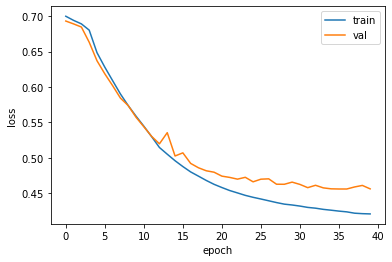

In [24]:
# 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
### LSTM (Long Short Term Memory) 신경망 모델 구성하기

- 순환신경망의 셀로 이전 타임스텝의 샘플을 기억하고 있음 
- 타임스탬프란 밀집노드의 예측한 값을 기억의 순서와 문장 정보를 기억
- 밀집층 하기 전 단계

![](../Data/lstm.png)

In [25]:
model = keras.Sequential()
# 16, hyperparameter
model.add(keras.layers.Embedding(500, 16, input_length = 100)) # one hot encoding
# 8 = > cell
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [26]:
# optimizer
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    # 손실함수는 출력층에 따라 0,1
    loss = "binary_crossentropy",
    metrics = "accuracy",
    )
# 최적의 값 찾기
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-lstm-model.h5")
# 조기종료 
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    # 최소 
    epochs = 100,
    batch_size = 64, # mini batch 경사 하강법( 순환갯수 )
    # 검증 data
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 15s 37ms/step - loss: 0.6913 - accuracy: 0.5581 - val_loss: 0.6895 - val_accuracy: 0.6010
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6853 - accuracy: 0.6316 - val_loss: 0.6803 - val_accuracy: 0.6078
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6538 - accuracy: 0.6363 - val_loss: 0.6299 - val_accuracy: 0.6796
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6003 - accuracy: 0.7401 - val_loss: 0.5916 - val_accuracy: 0.7418
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5715 - accuracy: 0.7613 - val_loss: 0.5713 - val_accuracy: 0.7582
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5529 - accuracy: 0.7697 - val_loss: 0.5543 - val_accuracy: 0.7662
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5376 - accuracy: 0.7765 - val_loss: 0.5400 - val_ac

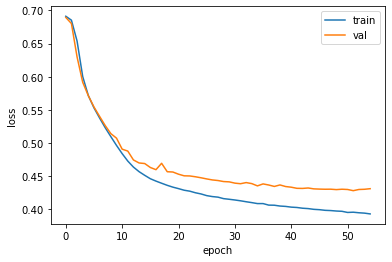

In [27]:
# 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 과대적합 발생 
# train의 loss가 더 많음 

In [28]:
# 검증데이터의 loss, 정확도 
model.evaluate(val_seq,val_target)

157/157 [==============================] - 1s 7ms/step - loss: 0.4279 - accuracy: 0.8034


[0.4279139041900635, 0.8033999800682068]

---
# 순환층에 드롭아웃 적용하기

In [29]:
model = keras.Sequential()
# 16, hyperparameter
model.add(keras.layers.Embedding(500, 16, input_length = 100)) # one hot encoding
# 8 = > cell
model.add(keras.layers.LSTM(8,dropout=0.3))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [30]:
# optimizer
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    # 손실함수는 출력층에 따라 0,1
    loss = "binary_crossentropy",
    metrics = "accuracy",
    )
# 최적의 값 찾기
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-dropout-model.h5")
# 조기종료 
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    # 최소 
    epochs = 100,
    batch_size = 64, # mini batch 경사 하강법( 순환갯수 )
    # 검증 data
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 14s 33ms/step - loss: 0.6925 - accuracy: 0.5304 - val_loss: 0.6918 - val_accuracy: 0.5608
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6908 - accuracy: 0.5838 - val_loss: 0.6894 - val_accuracy: 0.6196
Epoch 3/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6856 - accuracy: 0.6449 - val_loss: 0.6791 - val_accuracy: 0.6914
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6466 - accuracy: 0.6937 - val_loss: 0.6152 - val_accuracy: 0.6954
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6052 - accuracy: 0.7027 - val_loss: 0.5917 - val_accuracy: 0.7142
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5847 - accuracy: 0.7211 - val_loss: 0.5726 - val_accuracy: 0.7360
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5667 - accuracy: 0.7352 - val_loss: 0.5553 - val_ac

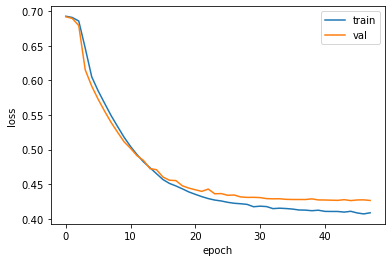

In [31]:
# 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 과대적합 발생 
# train의 loss가 더 많음 

In [32]:
# 검증데이터의 loss, 정확도 
model.evaluate(val_seq,val_target)

157/157 [==============================] - 1s 7ms/step - loss: 0.4263 - accuracy: 0.8026


[0.426316499710083, 0.8026000261306763]

---
# 2개층을 연결하기

In [33]:
model = keras.Sequential()
# 16, hyperparameter
model.add(keras.layers.Embedding(500, 16, input_length = 100)) # one hot encoding
# 8 = > cell
model.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True))
# lstm층 추가 
# 모든 타임스탭의 은닉상태를 출력하려면 return_sequence 이여야한다.(전체가 한 문장인지 알게 )
model.add(keras.layers.LSTM(8,dropout=0.3))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 훈련
# optimizer
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    # 손실함수는 출력층에 따라 0,1
    loss = "binary_crossentropy",
    metrics = "accuracy",
    )
# 최적의 값 찾기
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-2nn-model.h5")
# 조기종료 
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    # 최소 
    epochs = 100,
    batch_size = 64, # mini batch 경사 하강법( 순환갯수 )
    # 검증 data
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 30s 81ms/step - loss: 0.6927 - accuracy: 0.5429 - val_loss: 0.6921 - val_accuracy: 0.5858
Epoch 2/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6903 - accuracy: 0.6154 - val_loss: 0.6867 - val_accuracy: 0.6490
Epoch 3/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6746 - accuracy: 0.6352 - val_loss: 0.6509 - val_accuracy: 0.6876
Epoch 4/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6200 - accuracy: 0.6990 - val_loss: 0.5859 - val_accuracy: 0.7280
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5710 - accuracy: 0.7296 - val_loss: 0.5494 - val_accuracy: 0.7460
Epoch 6/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5436 - accuracy: 0.7426 - val_loss: 0.5256 - val_accuracy: 0.7592
Epoch 7/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5224 - accuracy: 0.7534 - val_loss: 0.5131 - val_ac

In [35]:
# 검증데이터의 loss, 정확도 
model.evaluate(val_seq,val_target)

157/157 [==============================] - 2s 11ms/step - loss: 0.4353 - accuracy: 0.7988


[0.4352980852127075, 0.798799991607666]

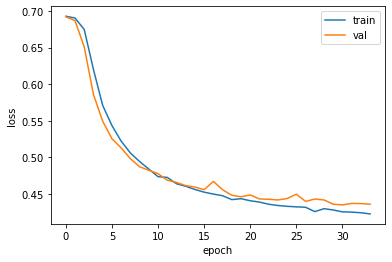

In [36]:
# 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 과대적합 발생 
# train의 loss가 더 많음 

- LSTM층은하나의 문장이 토큰 a,b,c 가 있다 할때 다음 셀은 outputA, outputAB, outputABC가 넘겨주어 학습한다.(바통터치하여 학습한다.)
- 그 후 dense 층으로 간다

### GRU(Gated Recurrent Unit) 신경망
- LSTM의 간소화 버전(모든 토큰을 기억하는 것이 퍼포먼스에 안 좋음)
- 자동 dropout

In [37]:
model = keras.Sequential()
# 16, hyperparameter
model.add(keras.layers.Embedding(500, 16, input_length = 100)) # one hot encoding
# 8 = > cell
model.add(keras.layers.GRU(8))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 훈련
# optimizer
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    # 손실함수는 출력층에 따라 0,1
    loss = "binary_crossentropy",
    metrics = "accuracy",
    )
# 최적의 값 찾기
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-gru-model.h5")
# 조기종료 
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    train_seq,
    train_target,
    # 최소 
    epochs = 100,
    batch_size = 64, # mini batch 경사 하강법( 순환갯수 )
    # 검증 data
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 17s 43ms/step - loss: 0.6926 - accuracy: 0.5321 - val_loss: 0.6920 - val_accuracy: 0.5526
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6908 - accuracy: 0.5793 - val_loss: 0.6900 - val_accuracy: 0.5818
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6877 - accuracy: 0.6039 - val_loss: 0.6864 - val_accuracy: 0.6010
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6819 - accuracy: 0.6244 - val_loss: 0.6793 - val_accuracy: 0.6176
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6710 - accuracy: 0.6414 - val_loss: 0.6653 - val_accuracy: 0.6408
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6479 - accuracy: 0.6658 - val_loss: 0.6336 - val_accuracy: 0.6704
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5909 - accuracy: 0.7060 - val_loss: 0.5631 - val_ac

In [39]:
# 검증데이터의 loss, 정확도 
model.evaluate(val_seq,val_target)

157/157 [==============================] - 1s 7ms/step - loss: 0.4374 - accuracy: 0.7990


[0.4373794496059418, 0.7990000247955322]

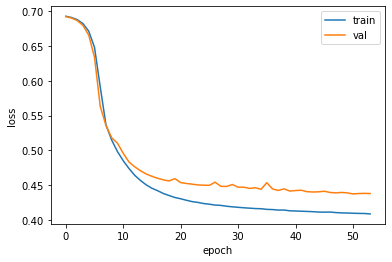

In [40]:
# 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 과대적합 발생 
# train의 loss가 더 많음 